#Importing our libraries
import os
import requests
import pandas as pd
import seaborn as sns
import hvplot.pandas
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
import panel as pn
pn.extension('plotly')
import plotly.express as px
from MCForecastTools import MCSimulation

%matplotlib inline

In [50]:
import os
import panel as pn
pn.extension('plotly')
import plotly.express as px
import requests
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import pandas_datareader as web
from pandas_datareader import data as wb
import seaborn as sns
import datetime as dt
import numpy as np
from matplotlib import style
from scipy.stats import norm
from pathlib import Path

%matplotlib inline

In [130]:
sp500_csv = Path("S&P500.csv")
sp500_df = pd.read_csv(sp500_csv)
sp500_df = sp500_df.rename(columns={"Close":"S&P500"})
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])
sp500_df.set_index(["Date"], inplace=True)
sp500_df

,S&P500
Date,
2016-01-04,2012.66
2016-01-05,2016.71
2016-01-06,1990.26
2016-01-07,1943.09
2016-01-08,1922.03
...,...
2022-01-18,4577.11
2022-01-19,4532.76
2022-01-20,4482.73


In [131]:
tickers = ["BTC-USD", "ETH-USD", "SOL-USD", "LTC-USD", "ATOM-USD"]
coins_data = pd.DataFrame()
coins_data[tickers] = web.DataReader(tickers, data_source='yahoo', start='2018-1-1')['Adj Close'].pct_change().dropna()
coins_data

,BTC-USD,ETH-USD,SOL-USD,LTC-USD,ATOM-USD
Date,,,,,
2020-04-11,-0.000934,-0.001240,-0.183202,0.001166,-0.001487
2020-04-12,0.016330,0.018496,0.136052,0.003100,0.012017
2020-04-13,-0.018082,-0.030177,-0.118611,-0.029351,-0.030470
2020-04-14,-0.000381,0.008426,-0.149013,-0.003653,0.037750
2020-04-15,-0.029276,-0.027345,-0.023075,-0.035679,-0.030297
...,...,...,...,...,...
2022-01-23,0.035585,0.053991,0.057336,0.033764,0.179979
2022-01-24,0.010407,-0.037351,-0.079616,-0.022285,0.043895
2022-01-25,0.008176,0.006385,0.033499,-0.013917,-0.002964


In [132]:
tickers = ["BTC-USD", "ETH-USD", "SOL-USD", "LTC-USD", "ATOM-USD"]
coins_data_volume = pd.DataFrame()
coins_data_volume[tickers] = wb.DataReader(tickers, data_source='yahoo', start='2018-1-1')['Volume'].pct_change().dropna()
coins_data_volume

,BTC-USD,ETH-USD,SOL-USD,LTC-USD,ATOM-USD
Date,,,,,
2020-04-11,-0.284272,-0.246141,-0.497936,-0.158160,-0.332518
2020-04-12,0.145329,0.115723,-0.116855,0.078441,-0.034145
2020-04-13,0.079971,0.088706,-0.529872,0.098540,0.026039
2020-04-14,-0.116752,-0.105806,-0.080372,-0.071267,0.028916
2020-04-15,-0.053418,-0.037451,-0.219275,-0.004413,0.038594
...,...,...,...,...,...
2022-01-23,-0.344873,-0.397820,-0.369176,-0.458858,-0.010192
2022-01-24,0.608759,0.712273,0.830529,0.449385,0.829037
2022-01-25,-0.368603,-0.426672,-0.390582,-0.447670,-0.358718


## Showing RAW Data - Bitcoin, Ethereum, Solana, Litecoin, Cosmos

In [133]:
start = dt.datetime(2018,1,1)
end =dt.datetime.now()

In [134]:
#Using our data source, Pandas-DataReader, to obtain historical daily output for Bitcoin
# I only selected the closing price straigth from the source

bitcoin = web.DataReader('BTC-USD', 'yahoo', start, end)

bitcoin

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,14112.200195,13154.700195,14112.200195,13657.200195,1.029120e+10,13657.200195
2018-01-02,15444.599609,13163.599609,13625.000000,14982.099609,1.684660e+10,14982.099609
2018-01-03,15572.799805,14844.500000,14978.200195,15201.000000,1.687190e+10,15201.000000
2018-01-04,15739.700195,14522.200195,15270.700195,15599.200195,2.178320e+10,15599.200195
2018-01-05,17705.199219,15202.799805,15477.200195,17429.500000,2.384090e+10,17429.500000
...,...,...,...,...,...,...
2022-01-23,36433.312500,34784.968750,35047.359375,36276.804688,2.601798e+10,36276.804688
2022-01-24,37247.519531,33184.058594,36275.734375,36654.328125,4.185666e+10,36654.328125
2022-01-25,37444.570312,35779.429688,36654.804688,36954.003906,2.642819e+10,36954.003906


In [135]:
#Using our data source, Pandas-DataReader, to obtain historical daily output for Ethereum
ethereum = web.DataReader('ETH-USD', 'yahoo', start, end)
ethereum

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,782.530029,742.004028,755.757019,772.640991,2.595760e+09,772.640991
2018-01-02,914.830017,772.346008,772.346008,884.443970,5.783350e+09,884.443970
2018-01-03,974.471008,868.450989,886.000000,962.719971,5.093160e+09,962.719971
2018-01-04,1045.079956,946.085999,961.713013,980.921997,6.502860e+09,980.921997
2018-01-05,1075.390015,956.325012,975.750000,997.719971,6.683150e+09,997.719971
...,...,...,...,...,...,...
2022-01-23,2542.144775,2381.515137,2406.924316,2535.039062,1.648149e+10,2535.039062
2022-01-24,2537.208496,2172.301270,2535.891113,2440.352295,2.822080e+10,2440.352295
2022-01-25,2498.507080,2359.384766,2440.393555,2455.935059,1.617978e+10,2455.935059


In [136]:
#Using our data source, Pandas-DataReader, to obtain historical daily output for Solana
solana = web.DataReader('SOL-USD', 'yahoo', start, end)
solana

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-10,1.313487,0.694187,0.832005,0.951054,8.736428e+07,0.951054
2020-04-11,1.049073,0.765020,0.951054,0.776819,4.386244e+07,0.776819
2020-04-12,0.956670,0.762426,0.785448,0.882507,3.873690e+07,0.882507
2020-04-13,0.891603,0.773976,0.890760,0.777832,1.821128e+07,0.777832
2020-04-14,0.796472,0.628169,0.777832,0.661925,1.674761e+07,0.661925
...,...,...,...,...,...,...
2022-01-23,104.519203,93.593483,94.307602,99.578224,2.548192e+09,99.578224
2022-01-24,99.770515,81.226051,99.617516,91.650162,4.664540e+09,91.650162
2022-01-25,99.701233,87.757126,91.660156,94.720352,2.842652e+09,94.720352


In [137]:
#Using our data source, Pandas-DataReader, to obtain historical daily output for Polygon
litecoin = web.DataReader('LTC-USD', 'yahoo', start, end)
litecoin

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,236.634003,222.203003,231.666000,229.033005,6.331420e+08,229.033005
2018-01-02,263.625000,228.990005,228.990005,255.684006,1.237950e+09,255.684006
2018-01-03,260.742004,243.134995,255.695007,245.367996,3.215280e+09,245.367996
2018-01-04,245.475006,227.013000,245.475006,241.369995,3.481550e+09,241.369995
2018-01-05,256.148010,237.880005,241.033997,249.270996,1.710600e+09,249.270996
...,...,...,...,...,...,...
2022-01-23,112.394455,106.599419,108.462196,112.089508,1.135598e+09,112.089508
2022-01-24,112.194672,98.665222,112.100815,109.591599,1.645919e+09,109.591599
2022-01-25,109.682343,106.339424,109.592476,108.066376,9.090911e+08,108.066376


In [138]:
#Using our data source, DataReader, to obtain historical daily output for Cosmos
cosmos = web.DataReader('ATOM-USD', 'yahoo', start, end)
cosmos

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-14,6.639943,6.353963,6.439715,6.526642,7.318172e+06,6.526642
2019-03-15,7.715249,6.432468,6.633174,7.504351,6.057301e+06,7.504351
2019-03-16,8.305615,6.694531,7.507990,7.383882,3.477393e+06,7.383882
2019-03-17,7.357443,4.727895,7.357443,4.776164,2.653565e+06,4.776164
2019-03-18,5.229982,4.828242,4.828242,5.110341,2.567201e+06,5.110341
...,...,...,...,...,...,...
2022-01-23,34.426041,29.191744,29.191744,34.396851,2.143797e+09,34.396851
2022-01-24,36.916538,30.106127,34.417797,35.906700,3.921084e+09,35.906700
2022-01-25,37.085804,35.057510,35.895691,35.800282,2.514519e+09,35.800282


### Data Cleanup - Obtaining what we need, deleting what we do not. Volume and Closing Price are needed.

In [139]:
#Drop unnecessary columns
bitcoin.drop(columns=['High', 'Low', 'Open', 'Close','Volume'],inplace=True)
#Rename columns 
bitcoin = bitcoin.rename(columns={"Adj Close":"Bitcoin"})
bitcoin

,Bitcoin
Date,
2018-01-01,13657.200195
2018-01-02,14982.099609
2018-01-03,15201.000000
2018-01-04,15599.200195
2018-01-05,17429.500000
...,...
2022-01-23,36276.804688
2022-01-24,36654.328125
2022-01-25,36954.003906


In [140]:
bitcoin1 = web.DataReader('BTC-USD', 'yahoo', start, end)
bitcoin1.drop(columns=['High', 'Low', 'Open', 'Close','Adj Close'],inplace=True)
bitcoin1 = bitcoin1.rename(columns={"Volume":" BTC Volume"})
bitcoin1

,BTC Volume
Date,
2018-01-01,1.029120e+10
2018-01-02,1.684660e+10
2018-01-03,1.687190e+10
2018-01-04,2.178320e+10
2018-01-05,2.384090e+10
...,...
2022-01-23,2.601798e+10
2022-01-24,4.185666e+10
2022-01-25,2.642819e+10


In [141]:
ethereum = web.DataReader('ETH-USD', 'yahoo', start, end)
ethereum.drop(columns=['High', 'Low', 'Open', 'Close','Volume'],inplace=True)
ethereum = ethereum.rename(columns={"Adj Close":"Ethereum"})
ethereum

,Ethereum
Date,
2018-01-01,772.640991
2018-01-02,884.443970
2018-01-03,962.719971
2018-01-04,980.921997
2018-01-05,997.719971
...,...
2022-01-23,2535.039062
2022-01-24,2440.352295
2022-01-25,2455.935059


In [142]:
ethereum1 = web.DataReader('ETH-USD', 'yahoo', start, end)
ethereum1.drop(columns=['High', 'Low', 'Open', 'Close','Adj Close'],inplace=True)
ethereum1 = ethereum1.rename(columns={"Volume":"ETH Volume"})
ethereum1

,ETH Volume
Date,
2018-01-01,2.595760e+09
2018-01-02,5.783350e+09
2018-01-03,5.093160e+09
2018-01-04,6.502860e+09
2018-01-05,6.683150e+09
...,...
2022-01-23,1.648149e+10
2022-01-24,2.822080e+10
2022-01-25,1.617978e+10


In [143]:
solana = web.DataReader('SOL-USD', 'yahoo', start, end)
solana.drop(columns=['High', 'Low', 'Open', 'Close','Volume'],inplace=True)
solana = solana.rename(columns={"Adj Close":"Solana"})
solana

,Solana
Date,
2020-04-10,0.951054
2020-04-11,0.776819
2020-04-12,0.882507
2020-04-13,0.777832
2020-04-14,0.661925
...,...
2022-01-23,99.578224
2022-01-24,91.650162
2022-01-25,94.720352


In [144]:
solana1 = web.DataReader('SOL-USD', 'yahoo', start, end)
solana1.drop(columns=['High', 'Low', 'Open', 'Close','Adj Close'],inplace=True)
solana1 = solana1.rename(columns={"Volume":"SOL Volume"})
solana1

,SOL Volume
Date,
2020-04-10,8.736428e+07
2020-04-11,4.386244e+07
2020-04-12,3.873690e+07
2020-04-13,1.821128e+07
2020-04-14,1.674761e+07
...,...
2022-01-23,2.548192e+09
2022-01-24,4.664540e+09
2022-01-25,2.842652e+09


In [145]:
cosmos = web.DataReader('ATOM-USD', 'yahoo', start, end)
cosmos.drop(columns=['High', 'Low', 'Open', 'Close','Volume'],inplace=True)
cosmos = cosmos.rename(columns={"Adj Close":"Cosmos"})
cosmos

,Cosmos
Date,
2019-03-14,6.526642
2019-03-15,7.504351
2019-03-16,7.383882
2019-03-17,4.776164
2019-03-18,5.110341
...,...
2022-01-23,34.396851
2022-01-24,35.906700
2022-01-25,35.800282


In [146]:
cosmos1 = web.DataReader('ATOM-USD', 'yahoo', start, end)
cosmos1.drop(columns=['High', 'Low', 'Open', 'Close','Adj Close'],inplace=True)
cosmos1 = cosmos1.rename(columns={"Volume":"ATOM Volume"})
cosmos1

,ATOM Volume
Date,
2019-03-14,7.318172e+06
2019-03-15,6.057301e+06
2019-03-16,3.477393e+06
2019-03-17,2.653565e+06
2019-03-18,2.567201e+06
...,...
2022-01-23,2.143797e+09
2022-01-24,3.921084e+09
2022-01-25,2.514519e+09


In [147]:
litecoin = web.DataReader('LTC-USD', 'yahoo', start, end)
litecoin.drop(columns=['High', 'Low', 'Open', 'Close','Volume'],inplace=True)
litecoin = litecoin.rename(columns={"Adj Close":"Litecoin"})
litecoin

,Litecoin
Date,
2018-01-01,229.033005
2018-01-02,255.684006
2018-01-03,245.367996
2018-01-04,241.369995
2018-01-05,249.270996
...,...
2022-01-23,112.089508
2022-01-24,109.591599
2022-01-25,108.066376


In [148]:
litecoin1 = web.DataReader('LTC-USD', 'yahoo', start, end)
litecoin1.drop(columns=['High', 'Low', 'Open', 'Close','Adj Close'],inplace=True)
litecoin1 = litecoin1.rename(columns={"Volume":"Litecoin Volume"})
litecoin1

,Litecoin Volume
Date,
2018-01-01,6.331420e+08
2018-01-02,1.237950e+09
2018-01-03,3.215280e+09
2018-01-04,3.481550e+09
2018-01-05,1.710600e+09
...,...
2022-01-23,1.135598e+09
2022-01-24,1.645919e+09
2022-01-25,9.090911e+08


In [149]:
# combined close data frame all selected coins
combined_close_df_all = pd.concat([bitcoin, ethereum, solana, cosmos, litecoin], axis='columns', join='inner').dropna()
combined_close_df_all

,Bitcoin,Ethereum,Solana,Cosmos,Litecoin
Date,,,,,
2020-04-10,6865.493164,158.412445,0.951054,2.307957,42.269814
2020-04-11,6859.083008,158.216019,0.776819,2.304524,42.319099
2020-04-12,6971.091797,161.142426,0.882507,2.332218,42.450287
2020-04-13,6845.037598,156.279556,0.777832,2.261155,41.204342
2020-04-14,6842.427734,157.596390,0.661925,2.346514,41.053841
...,...,...,...,...,...
2022-01-23,36276.804688,2535.039062,99.578224,34.396851,112.089508
2022-01-24,36654.328125,2440.352295,91.650162,35.906700,109.591599
2022-01-25,36954.003906,2455.935059,94.720352,35.800282,108.066376


In [150]:
#Combining Price data and converting to percent change. Dropping nulls.

combined_close_df = pd.concat([bitcoin, ethereum, solana, cosmos, litecoin], axis='columns', join='inner').pct_change().dropna()
combined_close_df

,Bitcoin,Ethereum,Solana,Cosmos,Litecoin
Date,,,,,
2020-04-11,-0.000934,-0.001240,-0.183202,-0.001487,0.001166
2020-04-12,0.016330,0.018496,0.136052,0.012017,0.003100
2020-04-13,-0.018082,-0.030177,-0.118611,-0.030470,-0.029351
2020-04-14,-0.000381,0.008426,-0.149013,0.037750,-0.003653
2020-04-15,-0.029276,-0.027345,-0.023075,-0.030297,-0.035679
...,...,...,...,...,...
2022-01-23,0.035585,0.053991,0.057336,0.179979,0.033764
2022-01-24,0.010407,-0.037351,-0.079616,0.043895,-0.022285
2022-01-25,0.008176,0.006385,0.033499,-0.002964,-0.013917


In [151]:
#Combining Volume data and converting to percent change. Dropping nulls.
combined_volume_df= pd.concat([bitcoin1, ethereum1, solana1,cosmos1, litecoin1], axis='columns', join='outer').pct_change().dropna()
combined_volume_df

,BTC Volume,ETH Volume,SOL Volume,ATOM Volume,Litecoin Volume
Date,,,,,
2020-04-11,-0.284272,-0.246141,-0.497936,-0.332518,-0.158160
2020-04-12,0.145329,0.115723,-0.116855,-0.034145,0.078441
2020-04-13,0.079971,0.088706,-0.529872,0.026039,0.098540
2020-04-14,-0.116752,-0.105806,-0.080372,0.028916,-0.071267
2020-04-15,-0.053418,-0.037451,-0.219275,0.038594,-0.004413
...,...,...,...,...,...
2022-01-23,-0.344873,-0.397820,-0.369176,-0.010192,-0.458858
2022-01-24,0.608759,0.712273,0.830529,0.829037,0.449385
2022-01-25,-0.368603,-0.426672,-0.390582,-0.358718,-0.447670


<AxesSubplot:xlabel='Date'>

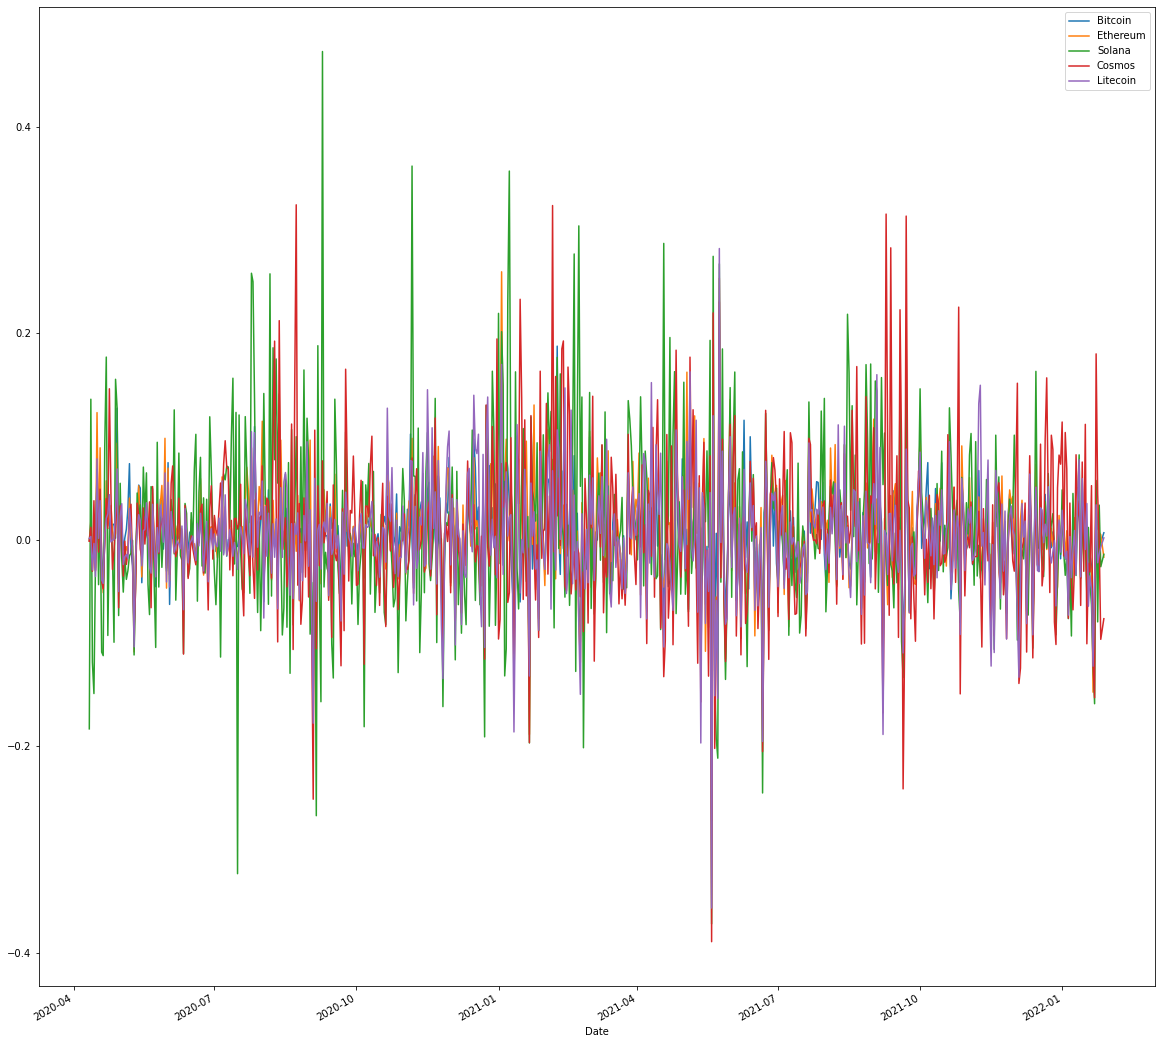

In [123]:
#Plotting percent change to show volatity of price
combined_close_df.plot(figsize=(20,20))

<AxesSubplot:xlabel='Date'>

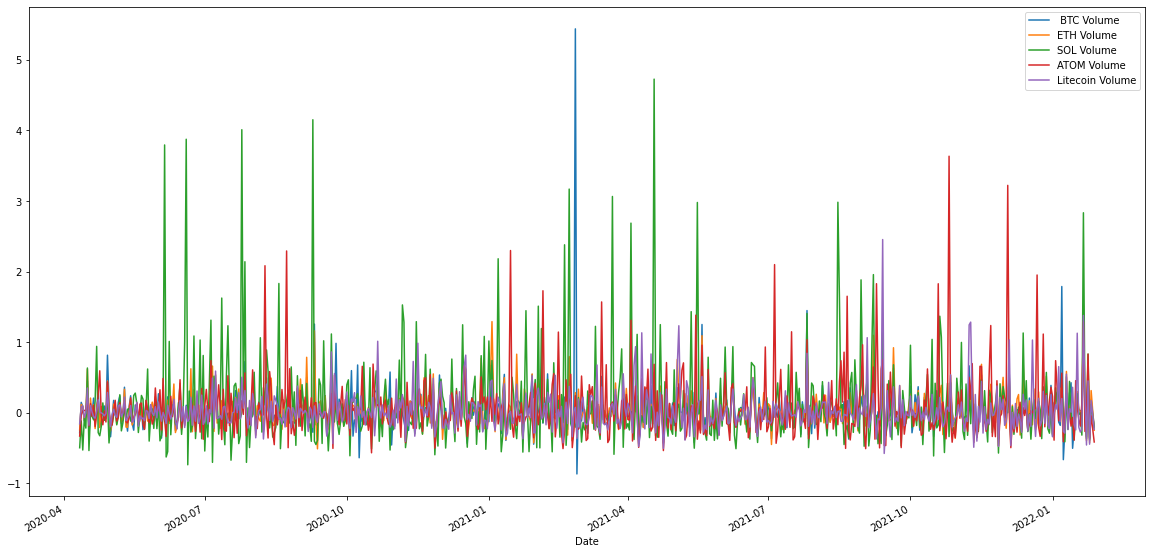

In [124]:
#Plotting percent change to show volatity of volume
combined_volume_df.plot(figsize=(20,10))

In [78]:
combined_close_df.std().dropna()
combined_close_df.tail(10)

,Bitcoin,Ethereum,Solana,Cosmos,Litecoin
Date,,,,,
2022-01-18,0.002960,-0.015030,0.011872,-0.022823,-0.064460
2022-01-19,-0.014898,-0.021555,-0.040927,-0.031293,-0.035056
2022-01-20,-0.025486,-0.030591,-0.063237,0.052348,-0.047852
2022-01-21,-0.103812,-0.147674,-0.119800,-0.118802,-0.122526
2022-01-22,-0.039143,-0.059716,-0.158867,-0.153048,-0.052131
2022-01-23,0.035585,0.053991,0.057336,0.179979,0.033764
2022-01-24,0.010407,-0.037351,-0.079616,0.043895,-0.022285
2022-01-25,0.008176,0.006385,0.033499,-0.002964,-0.013917
2022-01-26,-0.002757,0.004925,-0.026207,-0.096513,-0.007257


In [79]:
combined_close_df.describe()

,Bitcoin,Ethereum,Solana,Cosmos,Litecoin
count,657.000000,657.000000,657.000000,657.000000,657.000000
mean,0.003252,0.005393,0.010635,0.006644,0.002919
std,0.036934,0.049535,0.086574,0.074337,0.054106
min,-0.137661,-0.272003,-0.372088,-0.389349,-0.356729
25%,-0.014655,-0.020078,-0.038647,-0.031883,-0.024423
50%,0.002548,0.005487,0.001973,0.001920,0.002602
75%,0.021169,0.032534,0.051997,0.040198,0.028946
max,0.187465,0.259475,0.472828,0.324360,0.282016


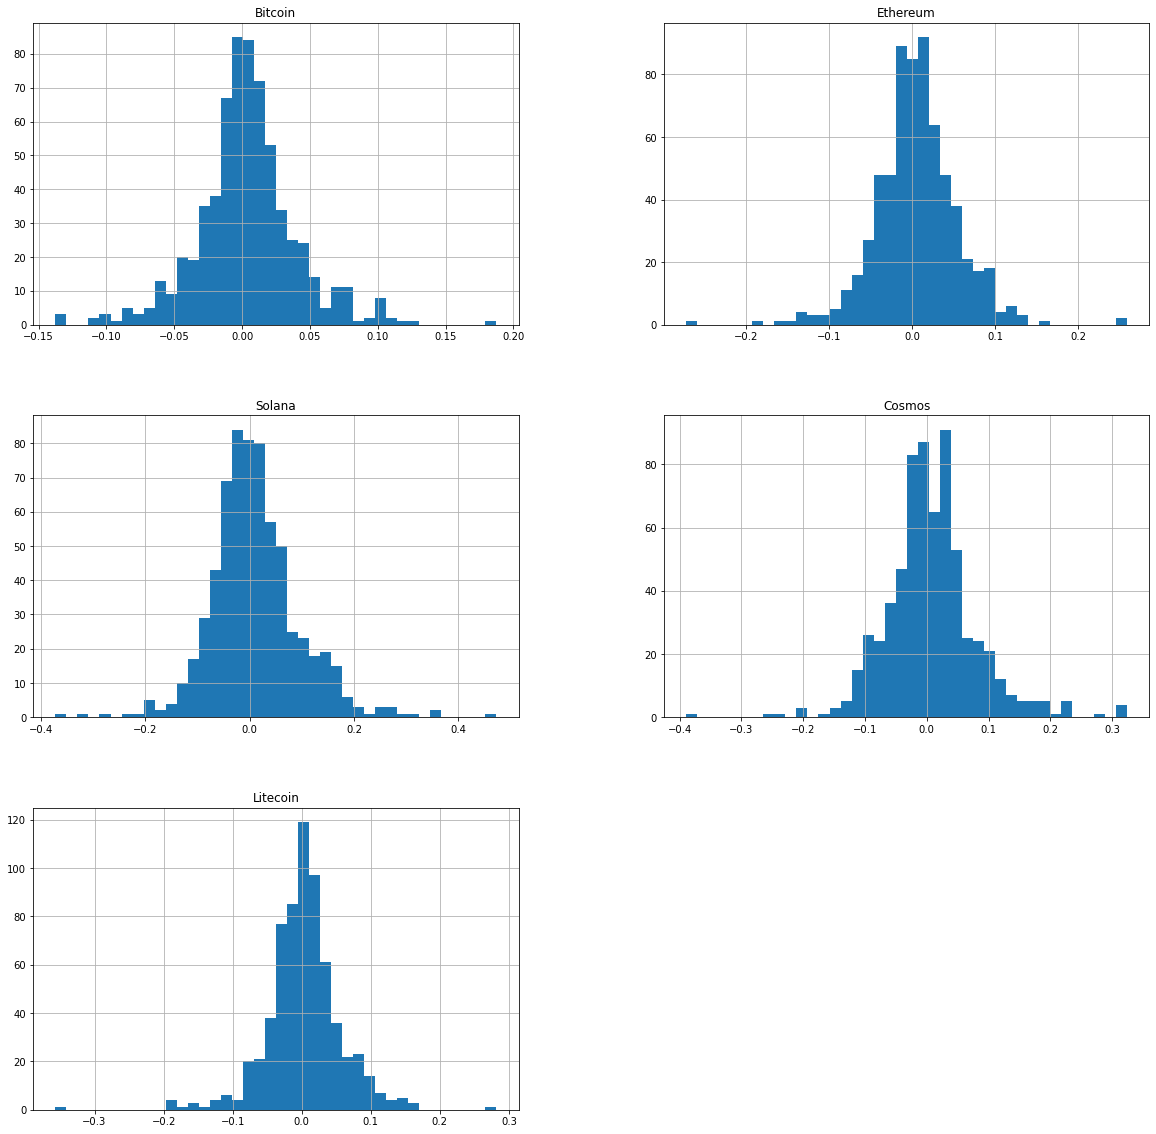

In [80]:
combined_close_df.hist(figsize=(20,20),bins=40);

In [81]:
combined_volume_df.std().dropna()
combined_volume_df.tail(10)

,BTC Volume,ETH Volume,SOL Volume,ATOM Volume,Litecoin Volume
Date,,,,,
2022-01-18,0.033484,0.055074,-0.025768,-0.092709,-0.204885
2022-01-19,0.030081,0.012536,-0.003293,-0.190516,-0.275684
2022-01-20,-0.117338,-0.192722,-0.318804,0.136610,-0.236802
2022-01-21,1.110289,1.517047,2.832630,1.290510,1.377539
2022-01-22,-0.076667,0.021398,0.070997,-0.267006,0.248592
2022-01-23,-0.344873,-0.397820,-0.369176,-0.010192,-0.458858
2022-01-24,0.608759,0.712273,0.830529,0.829037,0.449385
2022-01-25,-0.368603,-0.426672,-0.390582,-0.358718,-0.447670
2022-01-26,0.185272,0.312126,0.117684,-0.044868,0.170497


In [82]:
combined_volume_df.describe()

,BTC Volume,ETH Volume,SOL Volume,ATOM Volume,Litecoin Volume
count,657.000000,657.000000,657.000000,657.000000,657.000000
mean,0.032841,0.026627,0.118685,0.062494,0.028167
std,0.327185,0.250316,0.635309,0.425839,0.277762
min,-0.869188,-0.512922,-0.739352,-0.569453,-0.578490
25%,-0.126158,-0.136368,-0.223800,-0.173662,-0.128604
50%,-0.005294,-0.011857,-0.019616,-0.011062,-0.013596
75%,0.136844,0.127716,0.255823,0.173900,0.129336
max,5.439003,1.517047,4.726495,3.633905,2.452946


array([[<AxesSubplot:title={'center':' BTC Volume'}>,
        <AxesSubplot:title={'center':'ETH Volume'}>],
       [<AxesSubplot:title={'center':'SOL Volume'}>,
        <AxesSubplot:title={'center':'ATOM Volume'}>],
       [<AxesSubplot:title={'center':'Litecoin Volume'}>, <AxesSubplot:>]],
      dtype=object)

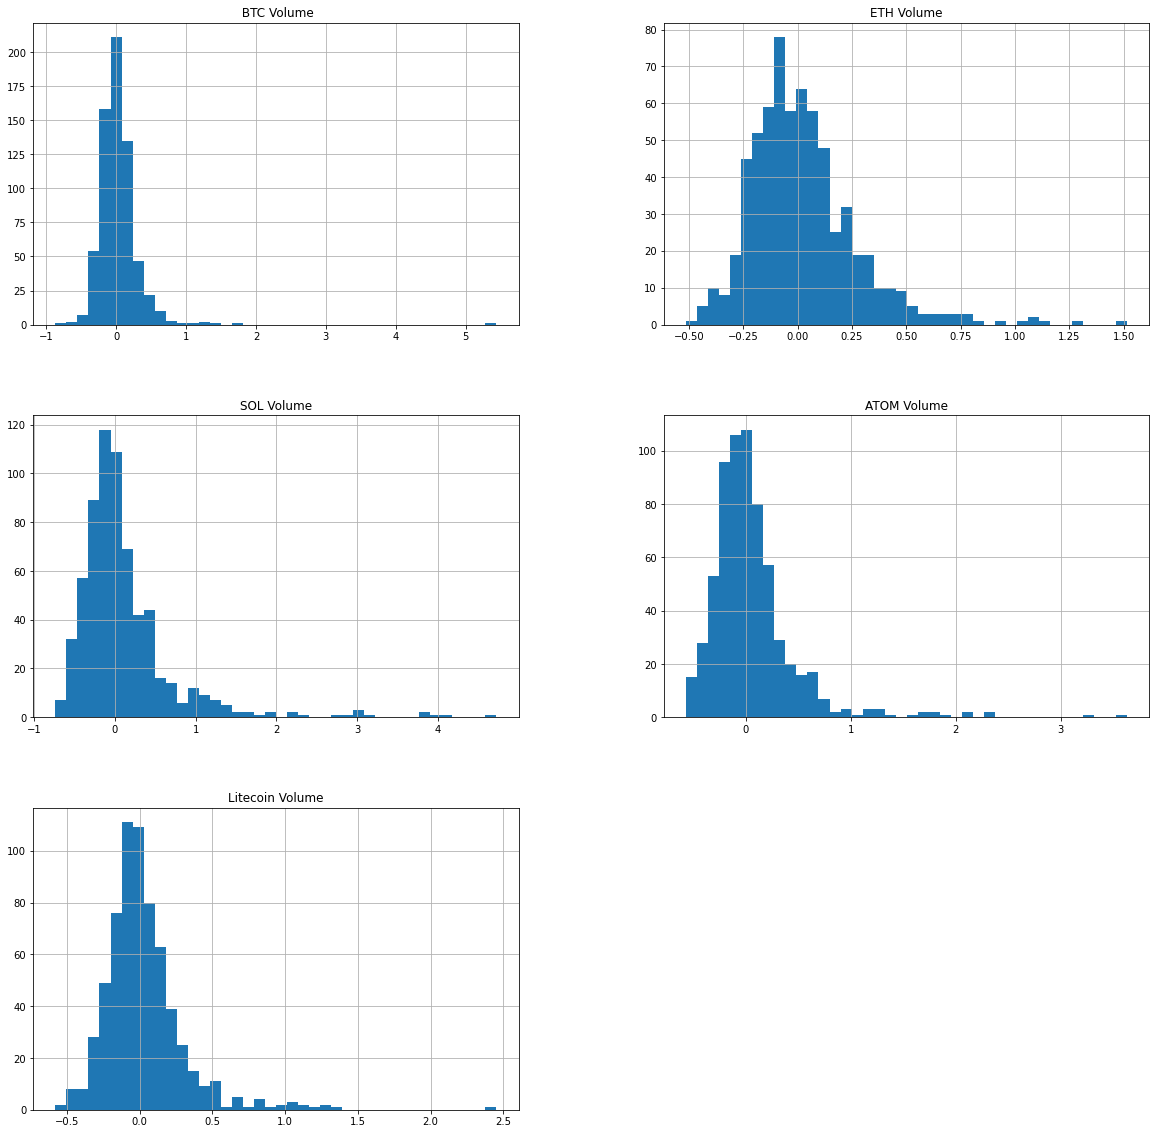

In [83]:
combined_volume_df.hist(figsize=(20,20),bins=40)

In [84]:
#HVPlot shows volality of price and volume
combined_close_df.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [85]:
combined_volume_df.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

<AxesSubplot:>

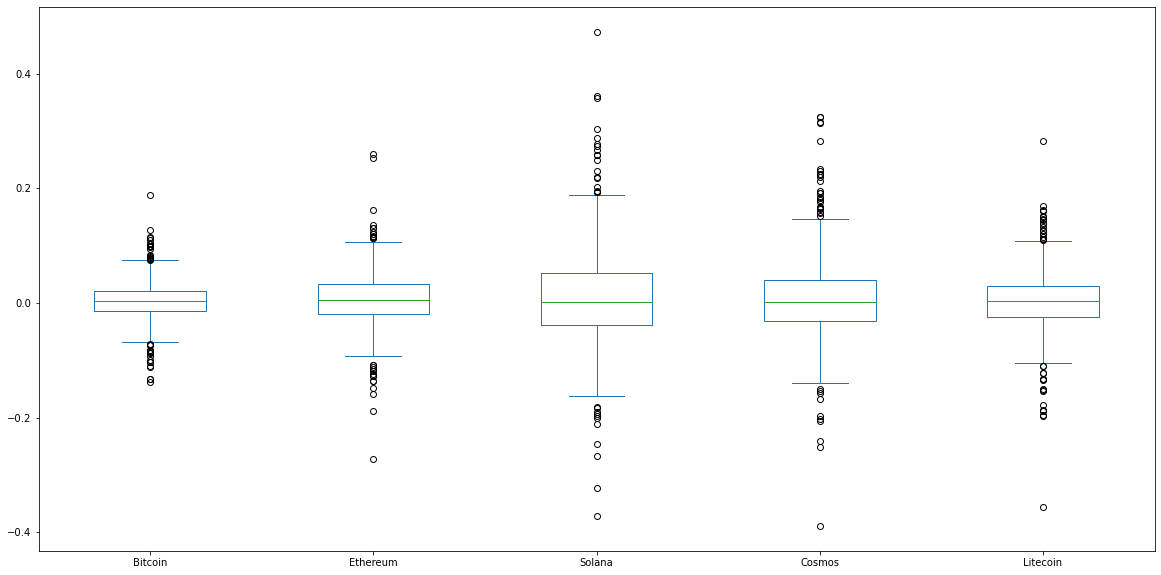

In [86]:
combined_close_df.plot.box(figsize=(20,10))

<AxesSubplot:>

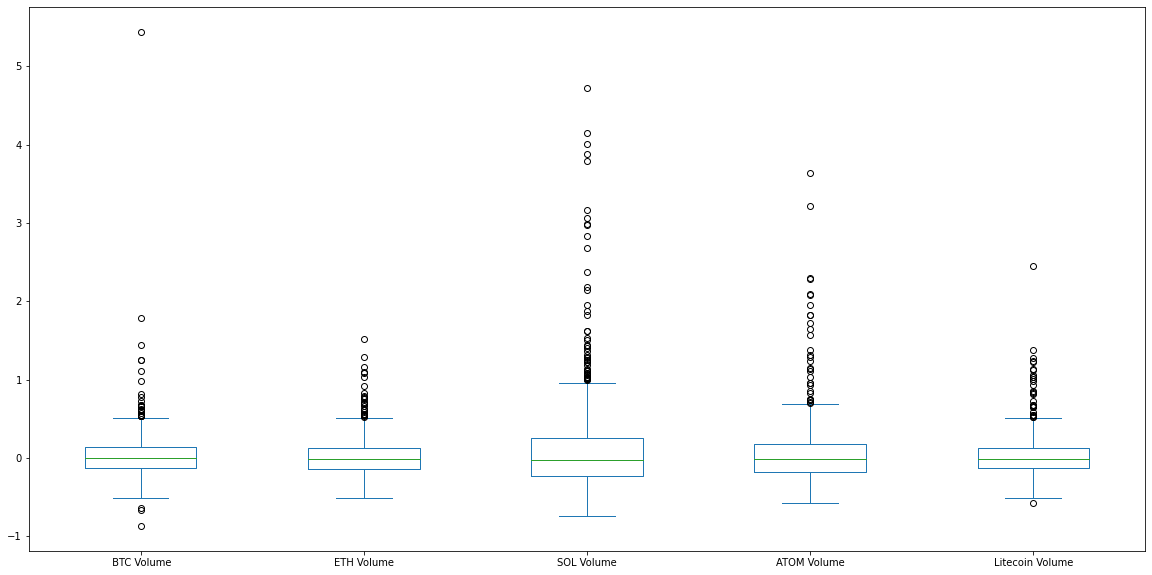

In [87]:
combined_volume_df.plot.box(figsize=(20,10))

In [88]:
combined_close_df.corr()

,Bitcoin,Ethereum,Solana,Cosmos,Litecoin
Bitcoin,1.000000,0.757264,0.348272,0.484619,0.775427
Ethereum,0.757264,1.000000,0.484851,0.568623,0.790949
Solana,0.348272,0.484851,1.000000,0.382681,0.391185
Cosmos,0.484619,0.568623,0.382681,1.000000,0.535112
Litecoin,0.775427,0.790949,0.391185,0.535112,1.000000


<AxesSubplot:>

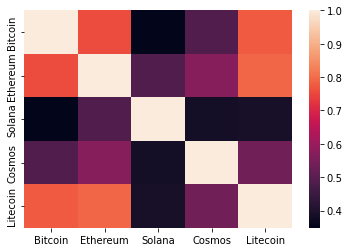

In [89]:
sns.heatmap(combined_close_df.corr())

In [90]:
combined_volume_df.corr()

,BTC Volume,ETH Volume,SOL Volume,ATOM Volume,Litecoin Volume
BTC Volume,1.000000,0.606731,0.214928,0.264051,0.436261
ETH Volume,0.606731,1.000000,0.341349,0.291688,0.597265
SOL Volume,0.214928,0.341349,1.000000,0.130137,0.233367
ATOM Volume,0.264051,0.291688,0.130137,1.000000,0.248327
Litecoin Volume,0.436261,0.597265,0.233367,0.248327,1.000000


<AxesSubplot:>

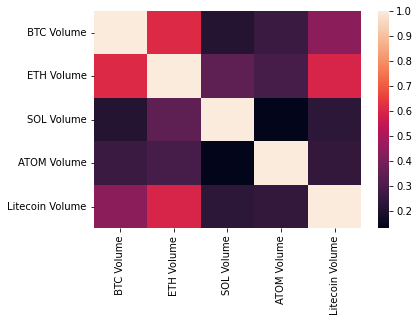

In [91]:
sns.heatmap(combined_volume_df.corr())

## S&P500 correlation against our portfolio

In [153]:
combined_close_sp500_df = pd.concat([bitcoin, ethereum, solana, cosmos, litecoin, sp500_df], axis='columns', join='inner').pct_change().dropna()
combined_close_sp500_df

,Bitcoin,Ethereum,Solana,Cosmos,Litecoin,S&P500
Date,,,,,,
2020-04-14,-0.000381,0.008426,-0.149013,0.037750,-0.003653,0.030573
2020-04-15,-0.029276,-0.027345,-0.023075,-0.030297,-0.035679,-0.022030
2020-04-16,0.071467,0.123106,0.068298,0.061794,0.078303,0.005817
2020-04-17,-0.002897,-0.003014,-0.043554,-0.012006,0.001312,0.026794
2020-04-20,-0.030189,0.003837,-0.184518,-0.041464,-0.044839,-0.017881
...,...,...,...,...,...,...
2022-01-18,-0.016800,-0.044102,-0.031280,-0.053069,-0.019583,-0.018388
2022-01-19,-0.014898,-0.021555,-0.040927,-0.031293,-0.035056,-0.009690
2022-01-20,-0.025486,-0.030591,-0.063237,0.052348,-0.047852,-0.011037


In [154]:
combined_close_sp500_df.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)